#### gradient descent

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

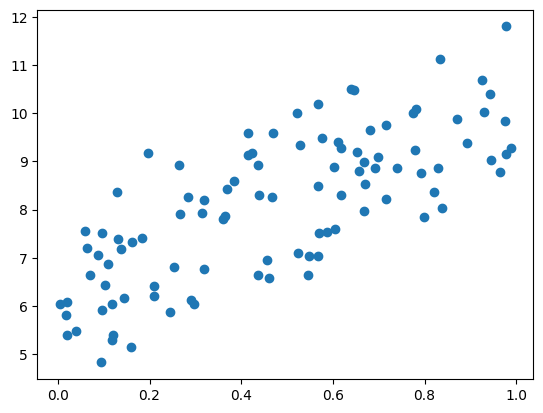

In [20]:
np.random.seed(0)

# y = 4x + 6
x = np.random.rand(100,1)
y = 4*x+6 + np.random.randn(100,1)

plt.scatter(x,y)

In [21]:
x.shape, y.shape

((100, 1), (100, 1))

In [22]:

def get_weight_updates(w1, w0, x, y, learning_rate=0.01):
    n = len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)

    y_pred = np.dot(x, w1.T) + w0
    diff = y-y_pred

    w0_factors = np.ones((n,1))

    # np.dot은 기본적으로 2개의 input만 받는다.
    w1_update = -(2/n)*learning_rate*(np.dot(x.T, diff))
    w0_update = -(2/n)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [23]:
w0 = np.zeros((1,1))
w1 = np.zeros((1,1))

n = len(y)
y_pred = np.dot(x, w1.T) + w0
diff = y - y_pred
print(diff.shape)

w0_factors = np.ones((100,1))
w1_updates = -(2/n)*0.01*(np.dot(x.T, diff))
w0_updates = -(2/n)*0.01*(np.dot(w0_factors.T, diff))
print(w1_updates.shape, w0_updates.shape)
w1, w0

(100, 1)
(1, 1) (1, 1)


(array([[0.]]), array([[0.]]))

#### Boston 주택가격 예측

In [24]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings('ignore')

from scipy import stats

In [25]:
boston = load_boston()

In [26]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [32]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head()
boston_df['PRICE'] = boston.target
print(boston_df.head())
print(boston_df.shape)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  
(506, 14)


In [36]:
boston_df['DIS']

0      4.0900
1      4.9671
2      4.9671
3      6.0622
4      6.0622
        ...  
501    2.4786
502    2.2875
503    2.1675
504    2.3889
505    2.5050
Name: DIS, Length: 506, dtype: float64

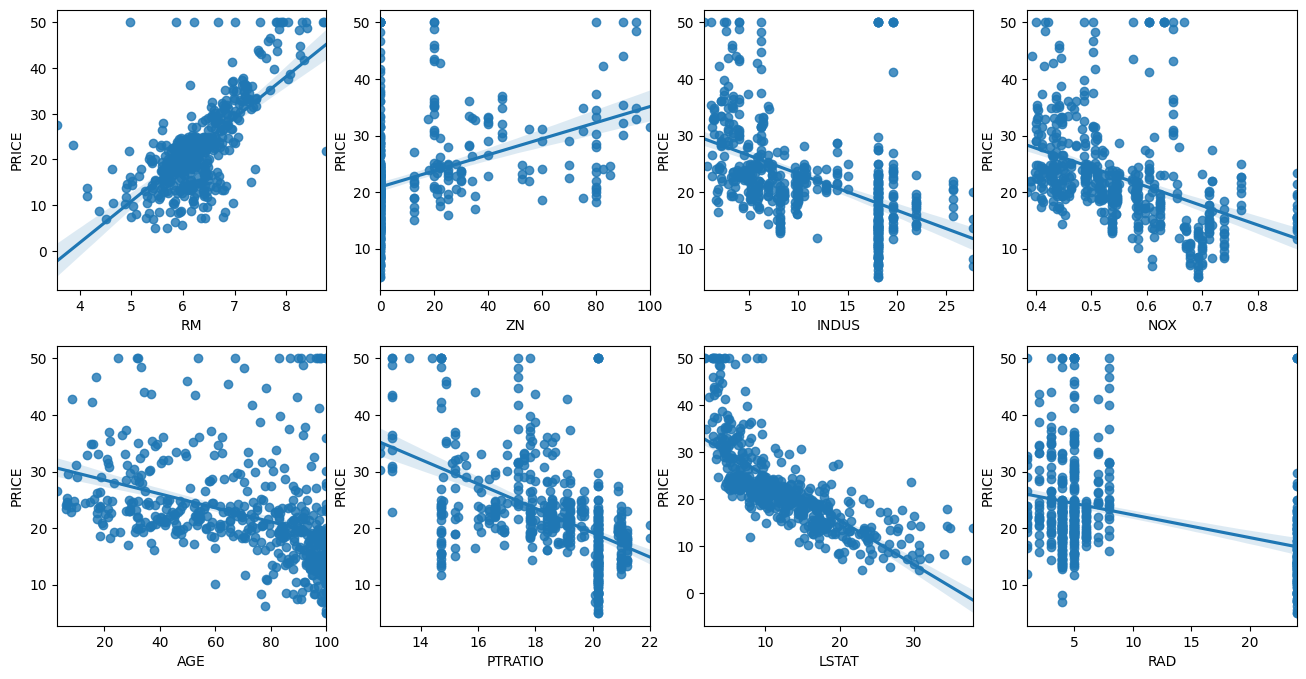

In [38]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    # print(row)
    # print(col)
    sns.regplot(x=feature , y='PRICE', data=boston_df , ax=axs[row][col])

#### Polynomial Regression
#### underfitting / overfitting

In [45]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

x = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature :\n', x)

poly = PolynomialFeatures(degree=2)
poly.fit(x)
poly_ftr = poly.transform(x)
print('변환된 2차 다항식 계수 feature \n', poly_ftr)


일차 단항식 계수 feature :
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [44]:
def polynomial : 
    

array([[0, 1],
       [2, 3]])

#### Regularized linear model
#### ridge

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

from sklearn.datasets import boston

boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names) 

boston_df['PRICE'] = boston.target

y_target = boston_df['PRICE']
x_data = boston_df.drop(['PRICE'], axis=1, inplace=False)

ridge = Ridge(alpha = 10)
neg_mse_score = cross_val_score(ridge, x_data, y_target, scoring='neg_mean_squared_error', cv = 5)
rmse_score = np.sqrt(-1 * neg_mse_score)
avg_rmse = np.mean(rmse_score)